# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [145]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [146]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [147]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [12,44,342]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,9670,7027,10471,541,4618,65
2,255,5758,5923,349,4595,1328


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Customer 12 had high spend for the Fresh, Milk, and Grocery product categories—above the 75th percentile. Spend for the Detergents_Paper and Delicatessen was relatively high—above the 50th percentile but below the 75th.  Spend for the Frozen product category was very low—below the 25th percentile. Based on these spending patterns, I imagine customer 12 to be an upmarket restaurant chain. A restaurant chain would purchase a higher percentage of perishable food to utilize the freshest ingredients. 

Customer 44 had high spend for the Detergents_Paper product category—above the 75th percentile. Spend for the Fresh, Milk, and Grocery product categories was high but fell within the 50th and 75th percentiles. Spend for the Frozen and Delicatessen product categories was very low—below the 25th percentile.  Based on these spending patterns, I imagine customer 44 to be urban corner store. The corner store would sell products that customers need right away and are willing to pay a premium in exchange for convenience. A corner store would offer items that run out frequently such as Detergents_Paper, Fresh, Milk and Grocery. This corner store would not have a deli to cost of staffing a deli nor would it have a large frozen foods section as customers are unlikely to make a quick trip to the corner store to pick up frozen vegetables or meals. 
 
Customer 342 had high spend in the Detergents_Paper product categories—above the 75th percentile. Spend for Milk, Grocery, and Delicatessen fell above the 50th percentile but below the 75th. Spend on Fresh and Frozen product categories was very low—below the 25th percentile. Based on these spending patterns, I imagine customer 342 to be a big-box discount superstore—a store where customers stock up on infrequent purchases in bulk because they discounted aggressively.  Since all the bulk purchases will require storage space, non-perishables are in high demand.  This would explain the low Fresh and Frozen sales as space in refrigerators and freezers is limited. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [148]:
## Import ShuffleSplit, Gridsearch, Decision Tree Regressor
from sklearn.cross_validation import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation

## create fit_model function that uses R^2
def fit_model(X, y):
    """ Performs grid search over the 'params' for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.25, random_state = 43)

    # initialize decision tree regressor object
    regressor = RandomForestRegressor(random_state=43, n_estimators =10)

    # parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

    # TODO: Create the grid search object
    # by leaving scoring param blank, GridSearch will use the score method of the estimator,
    # which is R^2.
    grid = GridSearchCV(estimator = regressor, param_grid = params,
                        cv = cv_sets)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Return the optimal model after fitting the data
    return grid.best_estimator_

def predict_all(feature):
    new_data = data.drop([feature], axis=1)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(new_data, 
                                                                         data[feature], 
                                                                         test_size = 0.25, 
                                                                         random_state = 43)
    cross_val_R2 = fit_model(X_train, y_train)
    score = cross_val_R2.score(X_test,y_test)
    print ("When predicting {}, the model " 
           "has an cross validation R^2 score of:  {:+.2f}%".format(feature, score*100))
    
#  Predict R^2 for all features    
for feature in data.columns.values:
    predict_all(feature)    

When predicting Fresh, the model has an cross validation R^2 score of:  +12.63%
When predicting Milk, the model has an cross validation R^2 score of:  +39.92%
When predicting Grocery, the model has an cross validation R^2 score of:  +72.15%
When predicting Frozen, the model has an cross validation R^2 score of:  +6.01%
When predicting Detergents_Paper, the model has an cross validation R^2 score of:  +58.35%
When predicting Delicatessen, the model has an cross validation R^2 score of:  +33.90%


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I chose to measure the effect of removing each feature separately, rather than just one feature. I chose the Random Forrest Regressor for my decision tree because they are easy to implement and the enabling of trees to use Bootstrap can offset a greedy learner—randomly forcing the tree to accept weak splits, allows the model to test other combinations that may lead to better overall performance. 

By removing each feature, I was able to see the relative impact of removing each feature iteratively. As expected, removing individual features affected the robustness of the model—measured by R^2. If after removing a feature the R^2 was high, then the feature was not very important as the model could still explain much of the variation in the data. However, if the R^2 as low or negative, then the feature was important because once removed, the model was unable to explain a significant amount of variation in the data. 

Based on my analysis, the feature that contributed the least was Grocery because the model had a high R^2 even after it was removed. I interpret this to mean that the information contained in the Grocery feature, is fairly superfluous because the other variables are able to explain a high percentage of that information when Grocery is removed. That is not to say it is useless and I would not consider removing the Grocery feature entirely. Instead, I would perform PCA to identify how much the dimensionality could be reduced while preserving a high percentage of information contained in the features. 



### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

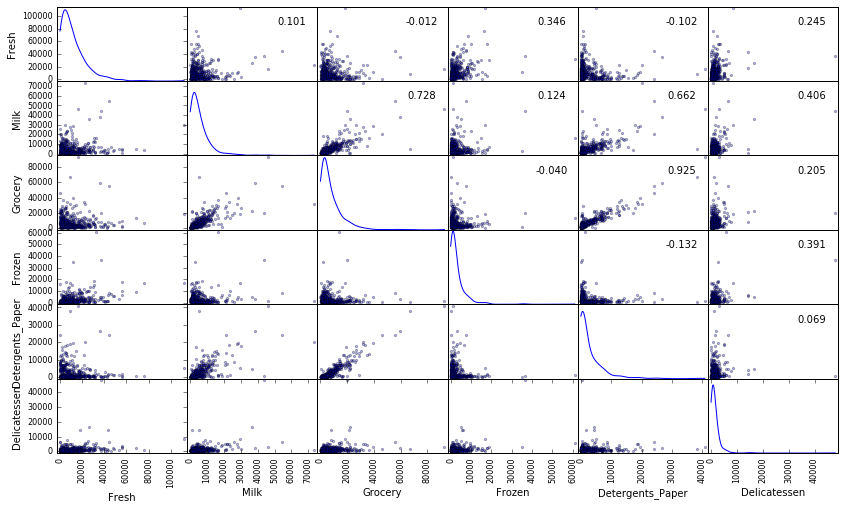

In [149]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

In Question #2, I asserted that the Grocery feature could be removed with the least amount of harm to the model because when removing each feature separately, the model without Grocery had the highest R^2. Grocery is very highly correlated with Detergents_Paper (92.5%) and highly correlated with Milk (72.8%). This confirms my suspicions that other variables can explain much of the same information as the Grocery feature—this is a good time to consider PCA to reduce dimensionality. The distribution of the features is skewed right—resembling a power-lognormal distribution. Most observations are at low values. The distribution quickly drops and then extends into a long right tail, indicating extreme outliers in at high values. The similarity to the power lognormal distribution can be seen in the image below.


In [150]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="http://www.itl.nist.gov/div898/handbook/eda/section3/gif/plnpdf4.gif")  

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

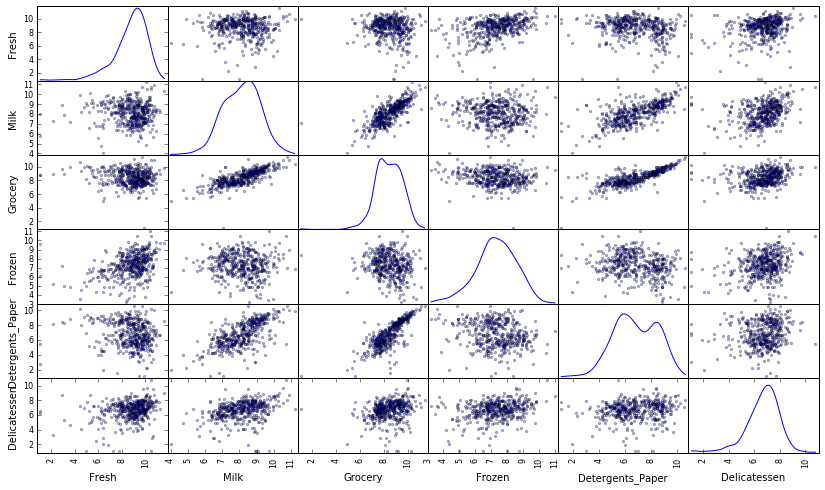

In [151]:
# TODO: Scale the data using the natural logarithm
log_data = data.copy()
log_data = np.log(log_data)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.copy()
log_samples = np.log(log_samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [152]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
1,9.176784,8.857515,9.256365,6.293419,8.437717,4.174387
2,5.541264,8.658345,8.686598,5.855072,8.432724,7.191429


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [153]:
drops = pd.DataFrame()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    # collect outliers in drops dataframe, add rows for each feature in the loop 
    if drops.empty:
        drops = pd.DataFrame(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    else:
            drops = drops.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
  

outlier_duplicates = drops.index.tolist()
# which outliers are listed twice 
more_once = set([x for x in outlier_duplicates if outlier_duplicates.count(x) == 2])
# which are listed three times 
more_twice = set([x for x in outlier_duplicates if outlier_duplicates.count(x) ==3])
print "Outlier data points with one duplicate value with a Tukey fence of (1.5 * IQR) are: {}".format(more_once) 
print "Outlier data points with two duplicate values with a Tukey fence of (1.5 * IQR) are: {}".format(more_twice)

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [12,44,342]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)


#create a list of the index values  with factor 2.2 * IQR to identify outliers
drops = pd.DataFrame()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 2.2 * (Q3-Q1)
    # Display the outliers
    # print "Data points considered outliers for the feature '{}':".format(feature)
    # collect outliers in drops dataframe, add rows for each feature in the loop 
    if drops.empty:
        drops = pd.DataFrame(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    else:
        drops = drops.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    # display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

# outliers beyond  3 times IQR
outliers = drops.index.tolist()
# Remove outliers from log_data.index: Double check they are not part of my three samples defined above

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "The outliers that were removed because they were beyond a Tukey Fence of (2.2 * IQR): {} ".format(outliers)

# check removed outliers + good_data = 440 (original length of rows)
check = len(outliers) + good_data.shape[0]
print "Rows of good_data plus removed outliers should equal 440. Result = {}".format(check)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outlier data points with one duplicate value with a Tukey fence of (1.5 * IQR) are: set([128, 65, 66, 75])
Outlier data points with two duplicate values with a Tukey fence of (1.5 * IQR) are: set([154])
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,9670,7027,10471,541,4618,65
2,255,5758,5923,349,4595,1328


The outliers that were removed because they were beyond a Tukey Fence of (2.2 * IQR): [66, 95, 96, 218, 338, 357, 75, 109, 128, 142, 154, 184, 187, 233] 
Rows of good_data plus removed outliers should equal 440. Result = 440


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Based on the definition above, there are 5 points that have multiple outliers in more than one feature. More specifically, there are four customers that have outliers in two features (128, 65, 66, 75) and there is only one customer that has outliers in three features (154.) A standard Tukey fence (1.5 * IQR) can help identify abnormal outliers but I chose to do some more research before removing anything. 

After the log transformation, the features were approximately normally distributed, indicating that the Tukey method would be appropriate. K-means uses an average to determine the cluster centers and like all averages, K-means is strongly influenced by extreme values. Gaussian Mixture Models are also sensitive to outliers and according to Linoff, GMMs can create a “‘solar system clusters’, with a big cluster in the middle and one or more small clusters containing the outliers.”  Since the clustering algorithms are sensitive to outliers, I decided to remove the most egregious outliers. I learned that in simulation testing, a multiplier of 2.2 can often lead to better results. 

I chose to re-run my analysis with a 2.2 multiplier to create a more conservative Tukey fence (2.2 * IQR.) Data points 128, 154 and 75 had duplicates with the 1.5 multiplier for Tukey fence and were on the 2.2 multiplier Tukey fence. The other two points (65, 66) while abnormal with a 1.5 multiplier, they did not influence the clustering algorithm as much as the outliers removed with a 2.2 Tukey fence.  

Souces: 

1.	https://books.google.com/books?id=AyQfVTDJypUC&pg=PA511&lpg=PA511&dq=is+GMM+sensitive+to+outliers?&source=bl&ots=KWMuxtSYEM&sig=IBcU_b4b7zdlnAHj9pElV1bp3QY&hl=en&sa=X&ved=0ahUKEwjixZKl4cbPAhWDoD4KHeHjBNEQ6AEIMzAD#v=onepage&q=is%20GMM%20sensitive%20to%20outliers%3F&f=false
2.	http://www.how2stats.net/2011/09/outliers-dos-and-donts.html
3.	https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/clustering/slides.pdf


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

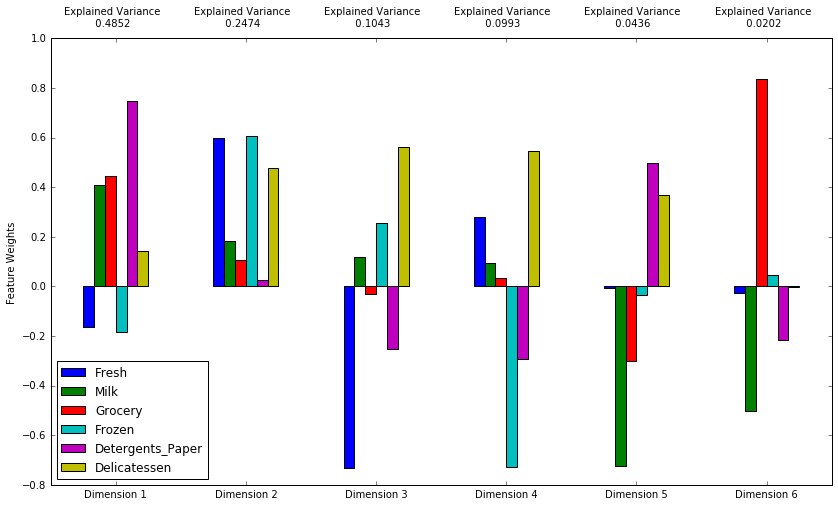

In [154]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
components = len(good_data.columns)
pca = PCA(n_components=components).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first and second principal component explain 73.26% of the variance (48.52% + 24.74%.) The first four principal components explain 93.62% ((48.52% + 24.74% + 10.43 + 9.93.) 

The visualization shows the weight (loadings) each feature has on the eigenvalue for that Principal Component (PC.) The features with very high or low weights indicate that a strong contribution in the positive or negative directions, respectively. Values closer to zero represent features with minimal impact on that PC. 

PC1: A very high positive weight is placed on the Detegents_Paper feature (78%), indicating that it contributes more than any other feature. Still significant but not as much are the medium positive weights that are placed on Milk and Grocery (39% and 42%.) The importance of the top three features could indicate a retail store that sells many household items and non-perishable food. 

PC2: High positive weights are placed on the Fresh and Frozen features (60% and 61%), indicating that these features have strongest contribution. Still significant but not as much is the medium positive weight placed on Delicatessen (46%.)  The weight close to zero for the Detergents_Paper feature makes sense because PC1 has already picked up much of the variance for this feature. The importance of the top three features indicates a restaurant that buys a lot of Fresh, Frozen and Delicatessen products.

PC3: Extreme negative weight for the Fresh feature (-77%) indicates the strongest contribution while Delicatessen contributes strongly in the positive direction (53%.)  Frozen and Detergents_Paper also contribute modestly in opposite directions (+21% and -23%.)  The importance of Fresh and Delicatessen indicate a corner store deli or café that specialized in fresh produce and sandwiches. 

PC4: Extreme negative weight for the Frozen feature (-76%) indicates the strongest contribution while Delicatessen contributes strongly in the positive direction (51%.)  Fresh and Detergents_Paper also contribute modestly in opposite directions (+27% and -25%.)  The importance of Frozen and Delicatessen indicate ice cream parlor that also sells sandwiches. 


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [155]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.2390,0.8458,-1.0963,2.0398,0.0079,-0.3113
1,1.6278,-1.4065,-2.3156,-0.9428,-0.8856,-0.0876
2,2.3976,-2.5003,1.9311,-0.0320,0.5737,-0.3927


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [156]:
# TODO: Apply PCA by fitting the good data with only two dimensions

pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [157]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.2390,0.8458
1,1.6278,-1.4065
2,2.3976,-2.5003


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-means is a hard assignment version of GMM—a special case of GMM. K-means clustering uses a loss function to minimize the sum of the squared distance between points the cluster centers. Since K-means uses hard assignment of points, the decision boundary between is rigid. K-means assumes spherical clusters with equal probability of a cluster. K-means is the simplest algorithm, works well on large datasets and is faster (does not need as much memory).  K-means is linear in the number of features—Big O notation: O(n). 

In contrast, GMM models take a more Bayesian approach, minimizing the negative log likelihood to determine clusters. GMMs use soft assignment (probabilistic) to assign data points to clusters. GMM can do more than assume spherical cluster shapes. GMM is a lot more flexible in terms of cluster covariance and accommodates mixed membership (a point belongs to each cluster to a different degree rather than the hard cutoff of K-means.) GMM runs slower as it is quadratic in the number of features—Big O notation = O(n^2).

Since the problem is small, I will use GMMs as the decreased speed and increased memory usage is not likely to make a significant impact on the run-time. 

References: 

1.	https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/clustering/slides.pdf
2.	https://en.wikipedia.org/wiki/Big_O_notation
3.	https://davidrosenberg.github.io/ml2015/docs/13.mixture-models.pdf



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [158]:
from sklearn.mixture import VBGMM
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 

clusterer = VBGMM(n_components=2, params = 'm', covariance_type = 'spherical', alpha = 1, random_state=43, n_iter = 500).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print "The highest mean silhoutte coefficent is {:%} and used only two clusters.".format(score)

The highest mean silhoutte coefficent is 43.734621% and used only two clusters.


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The silhouette score for two through seven clusters is: 43.73%, 34.47%, 33.27%, 35.33%, 35.10% and 33.38% respectively. The two cluster model has the best (highest) silhouette score of 43.73%, representing an 8.4% increase over the second best four cluster model. 


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

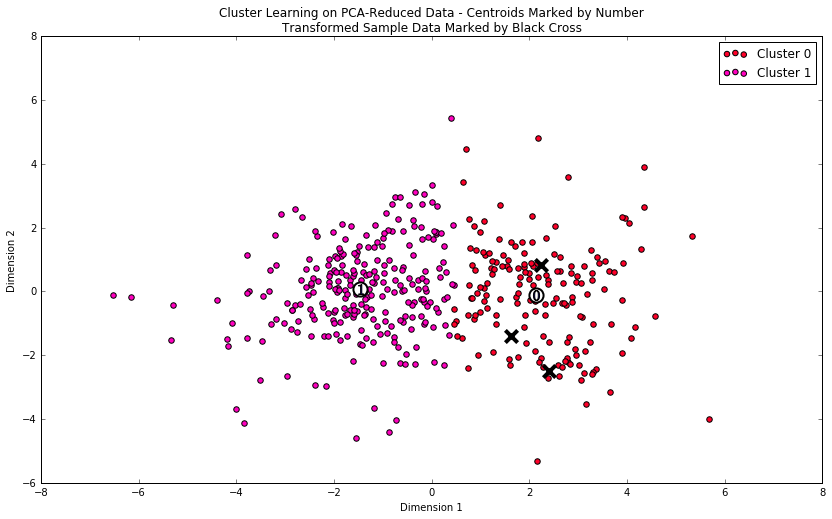

In [159]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [160]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4577.0,8013.0,11992.0,969.0,4513.0,1114.0
Segment 1,9202.0,1908.0,2466.0,2076.0,309.0,726.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Cluster_0 had high spend for Milk, Grocery, Detergents_Paper—above the 75th percentile.
Spend for Delicatessen was relatively high—above the 50th percentile but below the 75th.  
Spend for Fresh was relatively low—below the 50th percentile but above the 25th.  Spend for Frozen was very low—below the 25th percentile. Based on these spending patterns, I imagine Cluster_0 to be a “big-box discount superstore, school, hospital and restaurants.” A discount store’s customers stock up on infrequent purchases in bulk because they are discounted aggressively.  The low spending in Fresh and Frozen could be explained by the fact that bulk purchases will require storage space and space in refrigerators and freezer is quite limited. Although Milk would take up shelf space in the refrigerator, it can keep for weeks and families with kids could go through a lot of it. The school, hospital and restaurants would purchase a wide variety of food, with Frozen and Fresh the least purchased. 
 
Cluster_1 had relatively high spend for Fresh and Frozen—above the 50th percentile but below the 75th.  Spend for Milk, Grocery, Detgergents_Paper and Delicatessen were relatively low—below the 50th percentile but above the 25th. No product category spending was above or below the IQR. Based on these spending patterns, I imagine Cluster_1 to be a supermarket chain. A supermarket chain would purchase a higher volume of all product categories as seen above. 


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [161]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

Customer 12 (big-box discount store, school, hotel, restaurant): Customer 12 spent above the 50th percentile for Fresh, Milk Grocery, Detergents and Delicatessen while spending was below the 25th percentile in Frozen. This combination is most similar to Cluster_0 (big-box discount store, school, hotel, restaurant). 

Sample point 44 (big-box discount store, school, hotel, restaurant). Customer 44 spent above the 50th percentile for Fresh, Milk Grocery, and Detergents while spending was below the 25th percentile in Frozen and Delicatessen. This combination is most similar to Cluster_0 (big-box discount store, school, hotel, restaurant).

Customer 342 (supermarket cluster): Customer 342 spent below the 25th percentile in both Fresh and Frozen product categories.  Since Cluster_1 (supermarket cluster) had the highest relative spend in Fresh and Frozen, I would classify customer 342 in Cluster_1 (supermarket chain). 

Predictions were correct for Customer 12 and 44 but not for customer 342. The advantages of clustering algorithms are clear as I was unable properly group all three points into the appropriate cluster. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The customer segments identified by the clustering algorithm can provide insights as to which customer clusters are most likely to react positively. For example, Cluster_0 (big-box discount store, school, hotel, restaurant) would be less likely than Cluster_1 (supermarket chain) based on the most and least ordered product categories. 

Cluster_1 had the most spend in Fresh and no product category was below the 25th percentile. Fresh food is the clear winner of a more frequent delivery schedule as spoiled food does not sell. This would make Cluster_1 more likely to prefer a 3 day per week delivery schedule. However, I would not assume all customers with high purchases of Fresh Produce would react positively to the change in delivery schedule. Some customers may prefer the status quo—humans are notoriously averse to change. Customers may balk at increasing the frequency of delivery because changing the delivery schedule would necessitate rescheduling the receiving department’s schedule and staffing requirements. 

Cluster_0 spent very little on Fresh products—below the 50th percentile but above the 25th percentile. These customers are less likely to see the increased deliveries as an advantage because of the lower spend in Fresh food. That is not to say that all customers within Cluster_0 would like to keep the existing 5 days per week delivery schedules. Clear advantages for more frequent deliveries could include lower inventory carrying costs, fresher produce, and fewer stock-outs. 



### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The wholesale distributer could use a classification supervised learning algorithm to predict which customers belong to either cluster. To train the classification algorithm, the wholesale distributor would use the original data as the features while the cluster-labels are the target variable. Once trained, the classifier algorithm can predict which cluster_label each of the 10 new customers belong to based only on the their estimated spend. Once the class_labels are predicted for the new customers, the wholesale distributer would determine the most appropriate delivery service based on the previous answer that identified which cluster would be more likely to be in favor of more frequent deliveries. 



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

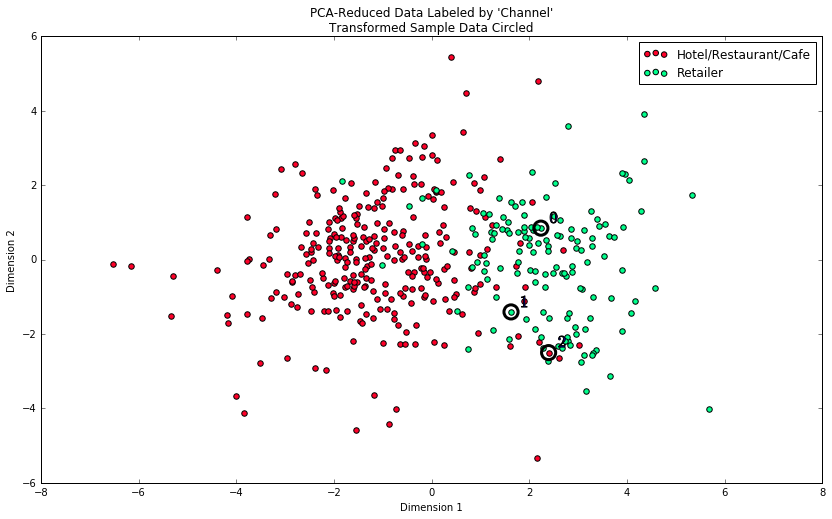

In [162]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithm and the number of clusters I’ve chosen compare favorably with the underlying Channel distribution of the “Hotel/Restaurant/Café” to the “Retail” customers. Overall, the PCA analysis was able to uncover the latent structure in the data. The silhouette score suggested using only two clusters, which coincides with the labels in the removed feature Channel. 

The most striking similarity is that when reduced to two dimensions, the Cluster_0 corresponds favorably to “Hotel/Restaurant/Café” and Cluster_1 corresponds favorably to “Retailer”. It looks like the clustering algorithm created a decision boundary between clusters with a vertical line at approximately x = 0.25.  This is very similar where the Channel’s labels switch from once class label to another; however, the actual distributions for Channel do not perfectly fall to the right or left of this imagined line. Because of overlap, the clustering algorithm would not split every customer into the correct Channel label.  

Within the clusters identified, customers with a Dimension_1 value over 2.5 are purely “Retailers” while customers with a Dimension_1 value of less than -2 are purely “Hotel/Restaurant/Café” channels. These were the only “pure” customer segments that did not have overlap of the Channel class labels. 

Without knowing much of the food industry, I believe my intuition about what type of hypothetical customer belonged to each segment proved consistent with the actual Channel labels.  While not perfect, I guessed that Cluster_0 corresponded to “big-box discount store/school/hotel/restaurant” while the actual label was “Hotel/Restaurant/Café.”  I guessed that Cluster_1 corresponded to “supermarket cluster” while the actual label was “Retailer.”  



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.